<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/DL/Modern%20Computer%20Vision%20with%20Pytorch/PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch.optim import SGD

print(torch.__version__)

1.12.0+cu113


## PyTorch tensors:
- scaler can be represented as a zero-dimensional tensor.
- scaler can be represented as a one-dimensional tensor.
- scaler can be represented as a tow-dimensional tensor.

### Initalize a tensor

In [82]:
x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

### object's shape and data type

In [83]:
print(x.shape)

torch.Size([1, 2])


In [84]:
print(y.shape)

torch.Size([2, 1])


In [85]:
print(x.dtype)

torch.int64


### Generate a tensor object with 3 rows and 4 columns filled with zeros

In [86]:
torch.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Generate a tensor object with 3 rows and 4 columns filled with ones

In [87]:
torch.ones((3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Generate three rows and four columns of vlaues between 0 and 10 (including just the low value but mot including the heigh value) 0 -> 9

In [88]:
torch.randint(low=0, high=10, size=(3,4))

tensor([[0, 8, 9, 3],
        [0, 9, 3, 7],
        [9, 5, 2, 9]])

### Generate random numbers between 0 and 1 with three row and four columns

In [89]:
torch.rand(3,4)

tensor([[0.4787, 0.5782, 0.7536, 0.1093],
        [0.4771, 0.1076, 0.9829, 0.1483],
        [0.5956, 0.3634, 0.7842, 0.5017]])

### convert a NumPy array into a Torch tensor

In [90]:
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [91]:
np_torch = torch.from_numpy(x)

In [92]:
print(type(x),type(np_torch))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


## Operations on tensors

### Multiplication of all the elemnts

In [93]:
x = torch.tensor([[1,2,3,4],
                  [5,6,7,8]])

print(x * 10)
print(x.shape)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
torch.Size([2, 4])


### Adding of all the elemnts

In [94]:
x = torch.tensor([[1,2,4,5],
                  [6,7,8,9]])
y = x.add(10)
print(y)

tensor([[11, 12, 14, 15],
        [16, 17, 18, 19]])


In [95]:
print( x + 10)

tensor([[11, 12, 14, 15],
        [16, 17, 18, 19]])


### Reshaping a tensor

In [96]:
y = torch.tensor([2,3,1,0])
print(y.shape)
y = y.view(4,1)
print(y.shape)

torch.Size([4])
torch.Size([4, 1])


### Adding a dimension to the matrix using unsqueeze

In [97]:
x = torch.randn(10,10)
print(x.shape)
z1 = x.unsqueeze(0)
print(z1.shape)

# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim at the
# specified axis

x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)

torch.Size([10, 10])
torch.Size([1, 10, 10])
torch.Size([1, 10, 10]) torch.Size([10, 1, 10]) torch.Size([10, 10, 1])


### Matrix multiplication of two different tensors

In [98]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
print(torch.matmul(x, y))

tensor([[11],
        [35]])


In [99]:
print(x@y)

tensor([[11],
        [35]])


### concatenation of tensors

In [100]:
x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, z.shape)

z = torch.cat([x,x], axis=1) # np.concatenate()
print('Cat axis 1:', x.shape, z.shape)

o = torch.cat([x,x], axis=2) # np.concatenate()
print('Cat axis 2:', x.shape, z.shape, o.shape)

Cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])
Cat axis 1: torch.Size([10, 10, 10]) torch.Size([10, 20, 10])
Cat axis 2: torch.Size([10, 10, 10]) torch.Size([10, 20, 10]) torch.Size([10, 10, 20])


### Extraction of the maximum value in tensor

In [101]:
x = torch.arange(25).reshape(5,5)
print(x)
print('Max:', x.shape, x.max()) 

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
Max: torch.Size([5, 5]) tensor(24)


In [102]:
x.max(dim=0) # row

torch.return_types.max(values=tensor([20, 21, 22, 23, 24]), indices=tensor([4, 4, 4, 4, 4]))

In [103]:
m, argm = x.max(dim=1) # columns
print('Max in axis 1:\n', m, argm) 

Max in axis 1:
 tensor([ 4,  9, 14, 19, 24]) tensor([4, 4, 4, 4, 4])


### Permute the dimensions of a tensor object
(swap dimensions)

In [104]:
x = torch.randn(10,20,30)
z = x.permute(1,0,2) # x.prmute(0,2,1) -> torch.Size(10,30,20)
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([20, 10, 30])


## Auto gradients of tensor objects

### 1. Define a tensor object
 requires_grad parameter specifies the gradient is to be calculated for the tensor object.

In [105]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True) 
print(x)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


### 2.  Define the way to calculate the output, wich in this specific case is the sum of the squares of all input: 

$\mathbf{output} = \sum_{i=1}^4 x_i^2$.

In [106]:
out = x.pow(2).sum()

In [107]:
out

tensor(7., grad_fn=<SumBackward0>)

### 3. The gradient of a value can be calculated

In [108]:
out.backward()

In [109]:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

####Computing gradients for the same case that was present in Chain_rule.ipynb notebook in previous chapter.

In [110]:
x = np.array([[1,1]])
y = np.array([[0]])
x, y = [torch.tensor(i).float() for i in [x,y]]
print(x,y)

tensor([[1., 1.]]) tensor([[0.]])


In [111]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

W = [torch.tensor(i, requires_grad=True) for i in W]
print(W)

[tensor([[-0.0053, -0.5820, -0.2723],
        [ 0.3793, -0.5204,  0.1896]], requires_grad=True), tensor([-0.0140,  0.5607, -0.0628], requires_grad=True), tensor([[ 0.1528],
        [-0.1745],
        [-0.1135]], requires_grad=True), tensor([-0.5516], requires_grad=True)]


In [112]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = torch.matmul(inputs,weights[0])+ weights[1]
    hidden = 1/(1+torch.exp(-pre_hidden))
    out = torch.matmul(hidden, weights[2]) + weights[3]
    mean_squared_error = torch.mean(torch.square(out - outputs))
    return mean_squared_error

In [113]:
loss = feed_forward(x, y, W)
loss

tensor(0.3346, grad_fn=<MeanBackward0>)

In [114]:
loss.backward()

In [115]:
print([w.grad for w in W])

[tensor([[-0.0428,  0.0469,  0.0327],
        [-0.0428,  0.0469,  0.0327]]), tensor([-0.0428,  0.0469,  0.0327]), tensor([[-0.6814],
        [-0.4255],
        [-0.5364]]), tensor([-1.1568])]


In [116]:
updated_W = [w-w.grad for w in W]
updated_W

[tensor([[ 0.0375, -0.6289, -0.3050],
         [ 0.4221, -0.5673,  0.1569]], grad_fn=<SubBackward0>),
 tensor([ 0.0288,  0.5138, -0.0955], grad_fn=<SubBackward0>),
 tensor([[0.8342],
         [0.2510],
         [0.4229]], grad_fn=<SubBackward0>),
 tensor([0.6052], grad_fn=<SubBackward0>)]

## Advantages of PyTorch's tensors over NumPy's ndarrays#

Numpy vs Torch computation speed comparison

### 1. Generate two different torch objects

In [117]:
x = torch.rand(1,6400)
y = torch.rand(6400,5000)

### 2. Define the device 

In [118]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
assert device == 'cuda', "This exercise assumes the notebook is on a GPU machine"

In [119]:
device

'cuda'

### 3. Storing information in a device

In [120]:
x,y = x.to(device=device),  y.to(device=device)

In [121]:
x

tensor([[0.3096, 0.1606, 0.7462,  ..., 0.2648, 0.3167, 0.9052]],
       device='cuda:0')

### 4. Perform matrix multiplication of Torch objects and time it to compare the speed  between Torch and Numpy

In [122]:
%timeit z=(x@y)

10000 loops, best of 5: 237 µs per loop


In [123]:
x, y = x.cpu(), y.cpu()
%timeit z=(x@y)

100 loops, best of 5: 8.65 ms per loop


In [124]:
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

10 loops, best of 5: 19.5 ms per loop


## Building a neural network using PyTorch

### 1. Define the input and output values:

In [125]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

### 2. Convert the input lists into tensor objects:

In [126]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

### 3. register the input and out put data points to the decive

In [127]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

### 4. Define the neural network architecture:

In [128]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)

  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

### 5. access the inital weights of each of the components: 

In [129]:
mynet = MyNeuralNet().to(device)

- Note: they are used only for illustration of how to obtain parameters of a given layer.

In [130]:
print(f'input to hidden layer weigths: \n {mynet.input_to_hidden_layer.weight}' ) # (2,8)

input to hidden layer weigths: 
 Parameter containing:
tensor([[-0.2462,  0.6568],
        [-0.1943,  0.1951],
        [-0.4083,  0.1317],
        [ 0.3268, -0.5531],
        [ 0.6873, -0.4925],
        [-0.0627,  0.3486],
        [ 0.6945,  0.2569],
        [-0.5516, -0.0247]], device='cuda:0', requires_grad=True)


In [131]:
print(f'hidden layer to output layer weigths: \n {mynet.hidden_to_output_layer.weight}' ) # (8,1)

hidden layer to output layer weigths: 
 Parameter containing:
tensor([[-4.1252e-02,  2.4823e-01, -3.1590e-01,  7.1085e-02, -6.6336e-02,
         -2.1027e-01, -1.3023e-05, -2.5583e-01]], device='cuda:0',
       requires_grad=True)


In [132]:
mynet.parameters

<bound method Module.parameters of MyNeuralNet(
  (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
)>

In [133]:
for par in mynet.parameters():
  print(par)

Parameter containing:
tensor([[-0.2462,  0.6568],
        [-0.1943,  0.1951],
        [-0.4083,  0.1317],
        [ 0.3268, -0.5531],
        [ 0.6873, -0.4925],
        [-0.0627,  0.3486],
        [ 0.6945,  0.2569],
        [-0.5516, -0.0247]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.4044, -0.1451, -0.2970, -0.2816, -0.3905,  0.3920, -0.0337, -0.4157],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-4.1252e-02,  2.4823e-01, -3.1590e-01,  7.1085e-02, -6.6336e-02,
         -2.1027e-01, -1.3023e-05, -2.5583e-01]], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([0.2873], device='cuda:0', requires_grad=True)


### 6. Define the loss function:
CrossEntropyLoss -> for multinomial classification.
BCELoss -> binary cross-entropy loss for binary classification.

In [134]:
loss_func = nn.MSELoss()

**The loss value of a neural network can be calculated by passing the input values through the neuralnet object and then calculating MSELoss for the given input.**

In [135]:
_Y = mynet(X) # _y -> prediction
print(f'- Prediction values: \n {_Y} \n')
print(f'- Actual values: \n {Y} \n')
loss_value = loss_func(_Y,Y)
print(f'- Loss value: \n {loss_value}')

- Prediction values: 
 tensor([[ 0.0568],
        [-0.0970],
        [-0.2568],
        [-0.4364]], device='cuda:0', grad_fn=<AddmmBackward0>) 

- Actual values: 
 tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0') 

- Loss value: 
 106.00655364990234


### 7.  Import the SGD method:

In [136]:
opt = SGD(mynet.parameters(), lr = 0.001)

###8. Perform all the steps to be done in an epoch together:

*NOTE: Problem:  Can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.*

*solution: 
Converting: type(loss_value): tensor -> numpy: tensor.cpu().detach.numpy()*

In [137]:
loss_history = []
for _ in range(50):
    opt.zero_grad() # flush the previous epoch's gradients. 
    loss_value = loss_func(mynet(X),Y) # compute loss.
    loss_value.backward() # perform back-propagation.
    loss_value = loss_value.cpu().detach().numpy() # Convert cuda:0 device type tensor to numpy to plotting.
    opt.step() # update the weights according to the gradients computed.
    loss_history.append(loss_value)

  *After Backpropagation:*

In [138]:
_Y = mynet(X) # _y -> prediction
print(f'- Prediction values: \n {_Y} \n')
print(f'- Actual values: \n {Y} \n')
loss_value = loss_func(_Y,Y)
print(f'- Loss value: \n {loss_value}')

- Prediction values: 
 tensor([[ 3.2669],
        [ 7.1364],
        [11.0059],
        [14.8754]], device='cuda:0', grad_fn=<AddmmBackward0>) 

- Actual values: 
 tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0') 

- Loss value: 
 0.026354173198342323


### *9. Plotting the vartion in loss over increasing epochs:*

Text(0, 0.5, 'loss value')

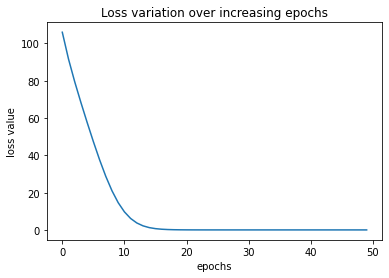

In [139]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## Implementing costom loss function

In [140]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
import torch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device) 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
mynet = MyNeuralNet().to(device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


In [141]:
def my_mean_squared_error(_y, y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

In [142]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)

tensor(139.7135, device='cuda:0', grad_fn=<MseLossBackward0>)


In [143]:
my_mean_squared_error(mynet(X),Y)

tensor(139.7135, device='cuda:0', grad_fn=<MeanBackward0>)

## Fetching the values of intemediate layers

In [144]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [145]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [146]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [147]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [148]:
torch.random.manual_seed(10)
mynet = MyNeuralNet().to(device)

In [149]:
loss_func = nn.MSELoss()


In [150]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(102.1545, device='cuda:0', grad_fn=<MseLossBackward0>)


In [151]:
opt = SGD(mynet.parameters(), lr = 0.001)


In [152]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    loss_value = loss_value.cpu().detach().numpy()
    opt.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'loss value')

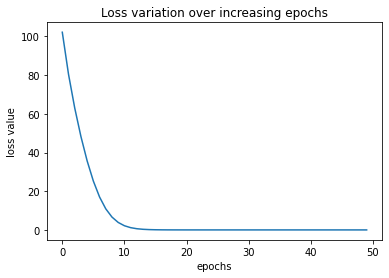

In [153]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

### **1. Fetching intermediate values by directly calling the intermediate layer:**

In [156]:
print(mynet.input_to_hidden_layer(X))

tensor([[-4.0139e-01,  7.2154e-03, -4.9131e-01,  1.4615e+00, -3.8093e-01,
         -7.1646e-01,  4.6765e-01,  2.0814e+00],
        [-5.6844e-01, -2.2575e-01, -1.5498e+00,  3.1695e+00, -5.2755e-01,
         -7.3935e-01,  1.9716e+00,  5.3073e+00],
        [-7.3548e-01, -4.5871e-01, -2.6083e+00,  4.8776e+00, -6.7418e-01,
         -7.6225e-01,  3.4756e+00,  8.5332e+00],
        [-9.0252e-01, -6.9167e-01, -3.6667e+00,  6.5856e+00, -8.2080e-01,
         -7.8514e-01,  4.9795e+00,  1.1759e+01]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


Text(0, 0.5, 'loss value')

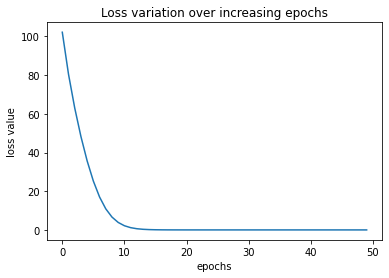

In [158]:
torch.random.manual_seed(10)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        x = self.hidden_to_output_layer(hidden2)
        return x, hidden1

mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
_Y, _Y_hidden = mynet(X)
loss_value = loss_func(_Y,Y)
opt = SGD(mynet.parameters(), lr = 0.001)
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X)[0],Y)
    loss_value.backward()
    loss_value = loss_value.cpu().detach().numpy()
    opt.step()
    loss_history.append(loss_value)


plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [161]:
mynet(X)[1] # access the hidden layer values. index 0 -> output of model & index 1 -> output of the hidden layer value.

tensor([[-4.0139e-01,  7.2154e-03, -4.9131e-01,  1.4615e+00, -3.8093e-01,
         -7.1646e-01,  4.6765e-01,  2.0814e+00],
        [-5.6844e-01, -2.2575e-01, -1.5498e+00,  3.1695e+00, -5.2755e-01,
         -7.3935e-01,  1.9716e+00,  5.3073e+00],
        [-7.3548e-01, -4.5871e-01, -2.6083e+00,  4.8776e+00, -6.7418e-01,
         -7.6225e-01,  3.4756e+00,  8.5332e+00],
        [-9.0252e-01, -6.9167e-01, -3.6667e+00,  6.5856e+00, -8.2080e-01,
         -7.8514e-01,  4.9795e+00,  1.1759e+01]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

## Using a sequential method to build a neural network

### 1. Define the dataset:

In [181]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

### 2. Define the device we will work on:

In [182]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 3. Define the dataset class:

In [183]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

### 4. Define the dataset and downloader object:

In [184]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

### 5. Define the model architecture usnig the Sequential method:

In [185]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

### 6. Print a summary of the model we defined in step 5:

In [186]:
!pip install torch_summary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
summary(model, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


### 7. Define the loss function, optimizer and train the model:

In [177]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

0.08501005172729492
0.08628201484680176


### 8. predict values on a validation dataset: 

In [178]:
val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()

In [179]:
model(val.to(device))

tensor([[16.3741],
        [19.9486],
        [ 4.7181]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [180]:
val.sum(-1)

tensor([17., 21.,  4.])